# **Classifier By Hand**


---


*   step by step how to code a binary classifier by hand!


---
A calorimeter in the context of experimental particle physics is a sub-detector aiming at measuring the energy of incoming particles. At CERN Large Hadron Collider, the giant multipurpose detectors ATLAS and CMS are both equipped with electromagnetic and hadronic calorimeters. The electronic calorimeter, as its name indicates, is measuring the energy of incoming electrons. It is a destructive method: the energetic electron entering the calorimeter will interact with its dense material via the electromagnetic force. It eventually results in the generation of a shower of particles (electromagnetic shower), with a characteristic average depth and width. The depth is along the direction of the incoming particle and the width is the dimension perpendicular to it.

Problem? There can be noisy signals in electromagnetic calorimeters that are generated by hadrons, not electrons.

Our mission is to help physicists by coding a classifier to select electron-showers (signal) from hadron-showers (background).




#**1. Get the Data**!
Download the dataset and put it on your GDrive. Open a new Jupyter-notebook from Google-Colab. To mount your drive:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!pwd

/content


In [ ]:
ls -l

total 8
drwx------ 5 root root 4096 Jan 20 11:29 gdrive/
drwxr-xr-x 1 root root 4096 Jan 18 14:21 sample_data/


In [ ]:
%cd /content/gdrive/

/content/gdrive


In [ ]:
ls -l

total 4
drwx------ 4 root root 4096 Jan 20 11:29 MyDrive/


In [ ]:
%cd MyDrive/

/content/gdrive/MyDrive


import the NumPy and pandas libraries:


In [ ]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#1.1 Get and load the data
Read the dataset into a dataframe df. What are the columns? Which column stores the labels (targets)?

In [ ]:
filename = "/content/gdrive/MyDrive/calo_shower_data.csv"
df = pd.read_csv(filename)
df.head()

,shower_depth,shower_width,type
0,102.726547,41.060509,hadron
1,55.953644,19.107106,electron
2,76.237938,21.859595,electron
3,145.829765,18.478401,hadron
4,151.974596,33.539821,hadron


*   We have three columns namely the column of shower_depth, the column of shower_width and the column of type.
*   The column which stores the labels(targets) is the column of type.



#1.2 How many samples are there?

In [ ]:
len(df)

100000

# **2. Feature Scaling**

2.1 Explain with math

*   Hint 1: recall that the parameters are usually initialized with
*   Hint 1.1: they are positive
*   Hint 2: recall the shape of the sigmoid and what it would imply on the cost function, especially for background samples.








# The gradient descent algorithm is an iterative algorithm that finds a local minimum of a function. In the case of logistic regression, the function being minimized is the cost function. The cost function is given by:

# $$J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log(h_\theta(x_i)) + (1-y_i) \log(1-h_\theta(x_i)) \right]$$

# where $m$ is the number of training examples, $y_i$ is the label of the $i$-th training example, $x_i$ is the feature vector of the $i$-th training example, and $h_\theta(x_i)$ is the predicted probability of the $i$-th training example being positive.

# If the features are not rescaled, then the gradient descent algorithm is likely to diverge because the cost function will be very sensitive to changes in the values of the features. This is because the cost function is a sum of terms, and each term is multiplied by the value of a feature. If one feature has a much larger value than the other features, then that term will dominate the cost function and the gradient descent algorithm will be biased towards that feature.

# To avoid this problem, the features should be rescaled so that they all have a similar range of values. This can be done by dividing each feature by its standard deviation.

# 2.2 Rescale the features
#
# Rescale the features so that they all have a mean of 0 and a standard deviation of 1.
#
# Hint: use the StandardScaler class from sklearn.preprocessing.


2.2 Standarization



*   Create for each input feature an extra column in the dataframe to rescale it to a distribution of zero-mean and unit-variance. To see statistical information on a dataframe, a convenient method is:



In [ ]:
df.describe()

,shower_depth,shower_width
count,100000.000000,100000.000000
mean,99.847703,25.060322
std,31.360512,9.073636
min,0.013479,0.139829
25%,80.005289,18.726105
50%,97.648121,22.890813
75%,121.048161,30.209608
max,222.651768,73.082693




*  We will take X1 and X2 in the order of the dataframe’s columns. By searching in the documentation for methods retrieving the mean and standard deviation, complete the following code:


*  Then check your results by calling df.describe() on the updated dataframe.







In [ ]:
MEAN_X1  = df['shower_depth'].mean()
MEAN_X1
SIGMA_X1 = df['shower_depth'].std()
MEAN_X2  = df['shower_width'].mean()
SIGMA_X2 = df['shower_width'].std()
df['shower_depth_scaled'] = (df['shower_depth']-MEAN_X1)/SIGMA_X1
df['shower_width_scaled'] = (df['shower_depth']-MEAN_X2)/SIGMA_X2
df.describe()

,shower_depth,shower_width,shower_depth_scaled,shower_width_scaled
count,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,99.847703,25.060322,3.672085e-16,8.242272
std,31.360512,9.073636,1.000000e+00,3.456223
min,0.013479,0.139829,-3.183437e+00,-2.760398
25%,80.005289,18.726105,-6.327197e-01,6.055452
50%,97.648121,22.890813,-7.013857e-02,7.999858
75%,121.048161,30.209608,6.760240e-01,10.578762
max,222.651768,73.082693,3.915882e+00,21.776435


# **3. Data Prep**

*  Let’s make the dataset ready for the classifier. The hypothesis function in the linear assumption has the dot product




3.1 Adding x0 column

*   Add a column x0 to the dataframe df filled entirely with ones.



In [ ]:
df['x_0']=np.ones(100000)
df

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x_0
0,102.726547,41.060509,hadron,0.091798,8.559548,1.0
1,55.953644,19.107106,electron,-1.399660,3.404735,1.0
2,76.237938,21.859595,electron,-0.752850,5.640254,1.0
3,145.829765,18.478401,hadron,1.466241,13.309928,1.0
4,151.974596,33.539821,hadron,1.662182,13.987146,1.0
...,...,...,...,...,...,...
99995,94.844879,22.915035,electron,-0.159526,7.690914,1.0
99996,91.389386,21.634711,electron,-0.269712,7.310086,1.0
99997,66.610819,23.150888,electron,-1.059832,4.579255,1.0
99998,94.607568,25.352104,electron,-0.167093,7.664760,1.0


3.2 Matrix X

*   Create a new dataframe X that contain the x0 column and the columns of the two scaled input features.




In [ ]:
X=df[['x_0','shower_depth_scaled','shower_width_scaled']]
X

,x_0,shower_depth_scaled,shower_width_scaled
0,1.0,0.091798,8.559548
1,1.0,-1.399660,3.404735
2,1.0,-0.752850,5.640254
3,1.0,1.466241,13.309928
4,1.0,1.662182,13.987146
...,...,...,...
99995,1.0,-0.159526,7.690914
99996,1.0,-0.269712,7.310086
99997,1.0,-1.059832,4.579255
99998,1.0,-0.167093,7.664760


3.3 Labels to binary

*   The target column contains alphabetical labels. Create an extra column in your dataframe called y containing 1 if the sample is an electron shower and 0 if it is a hadron one.


*   Hint: you can first create an extra column full of 0, then apply a filter using the .loc property from DataFrame. It can be in the form:







In [ ]:
df['type_upd']=np.zeros((100000,1))
df.loc[df['type']=='electron',['type_upd']]=1
df

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x_0,type_upd
0,102.726547,41.060509,hadron,0.091798,8.559548,1.0,0.0
1,55.953644,19.107106,electron,-1.399660,3.404735,1.0,1.0
2,76.237938,21.859595,electron,-0.752850,5.640254,1.0,1.0
3,145.829765,18.478401,hadron,1.466241,13.309928,1.0,0.0
4,151.974596,33.539821,hadron,1.662182,13.987146,1.0,0.0
...,...,...,...,...,...,...,...
99995,94.844879,22.915035,electron,-0.159526,7.690914,1.0,1.0
99996,91.389386,21.634711,electron,-0.269712,7.310086,1.0,1.0
99997,66.610819,23.150888,electron,-1.059832,4.579255,1.0,1.0
99998,94.607568,25.352104,electron,-0.167093,7.664760,1.0,1.0


3.4 Vector y


*   Extract from the dataframe this y column with the binary labels in a separate dataframe y.



In [ ]:
y=df['type_upd']
y

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    0.0
Name: type_upd, Length: 100000, dtype: float64

# **4. DataFrames to Numpy**

*    We need to split the dataset in a training and a testing sets. We will use the very convenient train_test_split method from Sciki-Learn. Then, we convert the resulting dataframes to NumPy arrays. This Python library is the standard in data science. In this assignment, you will manipulate NumPy arrays and build the foundations you need to master the programming aspect of machine learning.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split( X, y, test_size=0.2, random_state=42)

X_train = X_train_df.to_numpy() ; y_train = y_train_df.to_numpy()
X_test  = X_test_df.to_numpy()  ; y_test  = y_test_df.to_numpy()

4.1 Shapes

*  Show the dimensions of the four NumPy arrays using the .shape property.



In [ ]:
print('The Dimensions X_train is',X_train.shape)
print('The Dimensions y_train is',y_train.shape)
print('The Dimensions X_test is',X_test.shape)
print('The Dimensions y_test is',y_test.shape)

The Dimensions X_train is (80000, 3)
The Dimensions y_train is (80000,)
The Dimensions X_test is (20000, 3)
The Dimensions y_test is (20000,)


4.2 Test size


*   Looking at the shapes, explain what test_size represents.



In [ ]:
y_test_df.to_numpy()

array([1., 0., 0., ..., 0., 1., 1.])

# **5. Useful Functions**

---



*   We will code these functions as python functions to make the code more modular and easier to read.


5.1 Linear Sum


*  Write a function computing the linear sum of the features with the parameters for each input sample.


In [ ]:
def lin_sum(X, thetas):
  m=X.shape[0]
  n=X.shape[1]
  z=np.zeros((m,1))
  for i in range(m):
    for j in range(n):
      z[i]+=X[i,j]*thetas[0,j]
  return z
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train


array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [ ]:
T=X.values
thetas=np.zeros((1,3))
z=lin_sum(T,thetas)
z

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

5.2 Logistic Function






In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
m=sigmoid(z)
X_train.shape


(80000, 3)

5.3 Hypothesis Function

*   Using the two functions above, write the hypothesis function :



In [ ]:
def h_class(X, thetas):
  z=lin_sum(X, thetas)
  return sigmoid(z)
y_preds=h_class(X_test,thetas)
y_preds



array([[0.54265127],
       [0.57803997],
       [0.58538897],
       ...,
       [0.63384269],
       [0.4128207 ],
       [0.56323198]])

5.4 Partial Derivatives of Cross-Entropy Cost Function

*   Write a function that takes three column vectors (m 1) and computes the partial derivatives
for a given feature :



In [ ]:
def derivatives_cross_entropy(y_preds, y_obs, x_feature):
  m=len(x_feature)
  S=0
  for i in range(m):
    S=S+(y_preds[i,0]-y_obs[i,0])*x_feature[i]
  return (1/m)*S
X_train

array([[ 1.        , -0.30281529,  7.19567519],
       [ 1.        , -1.36895894,  3.51084477],
       [ 1.        , -0.18775343,  7.59335466],
       ...,
       [ 1.        ,  1.41171968, 13.12149073],
       [ 1.        , -1.98789396,  1.3716672 ],
       [ 1.        , -0.68124502,  5.8877376 ]])

5.5 Cross-Entropy Cost Function

*   Write a function computing the total cost from the 2D column vectors of predictions and observations:



In [ ]:
def cross_entropy_cost(y_vals, y_preds):
  m=len(y_preds)
  S=0
  for i in range(m):
    S=S+(y_vals[i,0]*np.log(y_preds[i,0])+(1-y_vals[i,0])*(np.log(1-y_preds[i,0])))
  return -(1/m)*S
y_train_df


75220    0.0
48955    1.0
44966    0.0
13568    0.0
92727    0.0
        ... 
6265     0.0
54886    0.0
76820    0.0
860      1.0
15795    1.0
Name: type_upd, Length: 80000, dtype: float64

# **6. Classifier**


*   Test your code frequently. To do so, you can assign dummy temporary values for the variables you do not use yet, so that python knows they are defined and your code can run.





In [ ]:
# Hyperparameters
alpha =0.001
N = 500

# Number of features + 1 (number of columns in X)
n = 3

# Initialization of theta *row vector*
thetas =np.random.rand(1,n)

# Storing cost values for train and test datasets
costs_train = []
costs_test  = []

print("Starting gradient descent\n")

# ------------------
#   Start iterations
# -------------------
for i in range(1, N+1):

  # Get predictions (hypothesis function)
  y_preds = h_class(X_train, thetas)
  y_preds_test = h_class(X_test, thetas)

  # Calculate and store costs with train and test datasets
  J_train = cross_entropy_cost(y_train, y_preds); costs_train.append(J_train)
  J_test  = cross_entropy_cost(y_test, y_preds_test); costs_test.append(J_test)

  # Get partial derivatives d/dTheta_j
  dJ_thetas = np.zeros(shape=(1, n))
  for j in range(n):
    dJ_thetas[0,j]=derivatives_cross_entropy(y_preds, y_train, X_train[:,j])

  # ...

  # Calculate new theta parameters:
  thetas_new =thetas-alpha*dJ_thetas

  # Update the parameters for the next iteration
  thetas=thetas_new

  # --------------------
  #  P R I N T O U T S
  # --------------------
  # Every 10 iterations and n > 100 every 100 iterations
  if (i<100 and i % 10 == 0) or (i>100 and i % 100 == 0):
    print('[%d]\tt0 = %4.4f  t1 = %4.4f  t2 = %4.4f  Cost = %4.4f  dJ0 = %4.4f  dJ1 = %4.4f  dJ2 = %4.4f' %
         ( i,   thetas[0,0], thetas[0,1], thetas[0,2],   J_train,  dJ_thetas[0,0],   dJ_thetas[0,1],   dJ_thetas[0,2]))

print(f'\nEnd of gradient descent after {i} iterations')
print('Optimized thetas:')
print(f'Theta 0 = {thetas[0,0]:.4f}, Theta 1 = {thetas[0,1]:.4f}, Theta 2 = {thetas[0,2]:.4f}')


Starting gradient descent

[10]	t0 = 0.1826  t1 = 0.3996  t2 = 0.4542  Cost = 2.7153  dJ0 = 0.4322  dJ1 = 0.4225  dJ2 = 5.0229
[20]	t0 = 0.1783  t1 = 0.3953  t2 = 0.4043  Cost = 2.4626  dJ0 = 0.4208  dJ1 = 0.4289  dJ2 = 4.9510
[30]	t0 = 0.1742  t1 = 0.3910  t2 = 0.3553  Cost = 2.2182  dJ0 = 0.4062  dJ1 = 0.4359  dJ2 = 4.8544
[40]	t0 = 0.1702  t1 = 0.3866  t2 = 0.3074  Cost = 1.9846  dJ0 = 0.3874  dJ1 = 0.4433  dJ2 = 4.7253
[50]	t0 = 0.1665  t1 = 0.3821  t2 = 0.2611  Cost = 1.7651  dJ0 = 0.3637  dJ1 = 0.4505  dJ2 = 4.5549
[60]	t0 = 0.1630  t1 = 0.3776  t2 = 0.2167  Cost = 1.5634  dJ0 = 0.3344  dJ1 = 0.4565  dJ2 = 4.3340
[70]	t0 = 0.1599  t1 = 0.3730  t2 = 0.1748  Cost = 1.3832  dJ0 = 0.2991  dJ1 = 0.4602  dJ2 = 4.0562
[80]	t0 = 0.1571  t1 = 0.3684  t2 = 0.1361  Cost = 1.2280  dJ0 = 0.2584  dJ1 = 0.4604  dJ2 = 3.7208
[90]	t0 = 0.1548  t1 = 0.3638  t2 = 0.1010  Cost = 1.0998  dJ0 = 0.2135  dJ1 = 0.4562  dJ2 = 3.3366
[200]	t0 = 0.1528  t1 = 0.3205  t2 = -0.0644  Cost = 0.7441  dJ0 = -0.092

# **7. Plot cost versus epochs**

In [ ]:
def plot_cost_vs_iter(train_costs, test_costs, title="Gradient Descent: Cost evolution"):

  fig, ax = plt.subplots(figsize=(8, 6))

  iters = np.arange(1,len(train_costs)+1)

  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')

  ax.set_xlabel("Number of iterations")
  ax.set_ylabel(r"Cost $J(\theta)$", rotation="horizontal")
  ax.yaxis.set_label_coords(-0.2, 0.5)

  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title, fontsize=18, pad=20)
  plt.show()

Call this macro:

7.1: Describe the plot; what is the fundamental difference between the two series train and test?

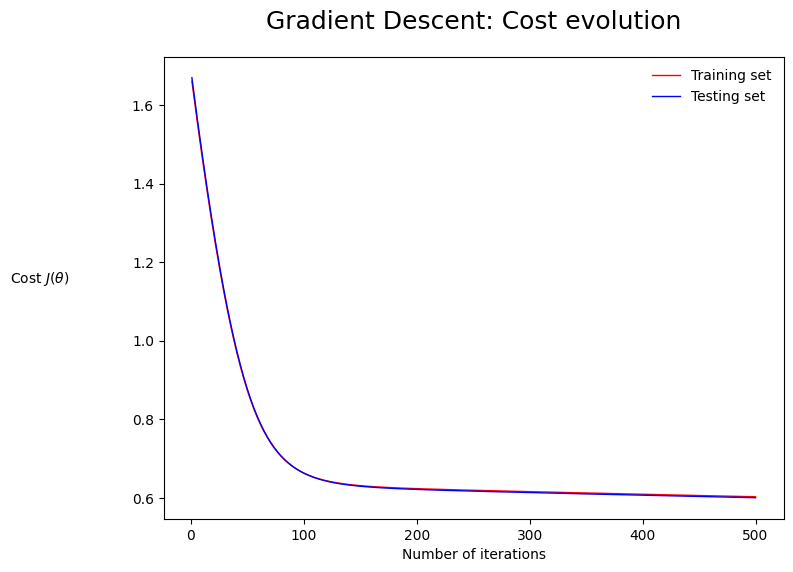

In [ ]:
plot_cost_vs_iter(costs_train, costs_test)

7.2: What would it mean if there would be a bigger gap between the test and training values of the cost?



*   We notice that the two graphs(Training set and Testing set) are practically identical, and therefore have the same appearance.


*   Therefore, both explain the predictions in the best way.

*  Now, if we assume that there is a large gap between the two, it will simply mean that the one which is close and practically skims the x-axis explains the prediction better than the other which is far from it.






# **8. Performance**

*  Before counting the true and false predictions, we need… predictions! We already wrote a function h_class outputting a prediction as a continuous variable between 0 and 1, equivalent to a probabilitiy. The function below is calling h_class and then fills a python list of binary predictions, so either 0 or 1. For the boundary.

*   The sigmoid is symmetric around y = 0.5, so we will work with this boundary for now.






In [ ]:
def make_predictions(thetas, X, y, boundary=0.5):

  bin_preds = [1 if value > boundary else 0 for value in h_class(X, np.array(thetas))[:,0] ]

  return bin_preds

Call the function:

In [ ]:
preds = make_predictions(thetas, X_test, y_test, 0.5)

We will work with lists from now on, so flatten the observed test values:


In [ ]:
# Turn y_test into 1D array:
obs_test = y_test[:,0]

8.1 Accuracy

*   Write a function computing the accuracy of the classifier:



In [ ]:
def get_accuracy(obs_values, pred_values):

  n=len(obs_values)
  s1=s2=0
  for i in range(n):
    if (obs_values[i]==pred_values[i]):
       s1=s1+1
    else:
      s2=s2+1

  return s1/(s2+s1)


In [ ]:
get_accuracy(obs_test , preds)

0.6112

8.2 Recall

In [ ]:
def get_recall(obs_values, pred_values):

  n=len(obs_values)
  s1=s2=0
  for i in range(n):
    if (obs_values[i]==1) and (pred_values[i]==1):
       s1=s1+1
    if (obs_values[i]==1) and (pred_values[i]==0):
        s2=s2+1
  return s1/(s1+s2)


In [ ]:
get_recall(obs_test, preds)

0.23890339425587467

# **BRAVO! We know now the math behind a binary classifier![link text](https://)**